In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import os
from psmpy import PsmPy
from psmpy.functions import cohenD
from psmpy.plotting import *

sns.set(rc={"figure.figsize": (10, 8)}, font_scale=1.3)
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [2]:
aa = pd.read_csv(os.path.join("data", "generated", "cohort", "aa.csv"), nrows=5000)
ca = pd.read_csv(os.path.join("data", "generated", "cohort", "ca.csv"))
aa["race"] = 0
ca["race"] = 1
dataset = pd.concat([aa, ca])
dataset["index"] = (
    dataset.index.values.astype("str") + dataset["first_name"] + dataset["last_name"]
)


dataset.head()

,first_name,last_name,age,gender,race,index
0,TAMIKA,Bridgewater,47,f,0,0TAMIKABridgewater
1,JAMILA,Ransom,44,f,0,1JAMILARansom
2,RICKI,Brock,39,f,0,2RICKIBrock
3,WENDELL,Porter,78,m,0,3WENDELLPorter
4,TY,Lee,27,m,0,4TYLee


In [3]:
dataset.groupby("race").describe()

age                                                     
        count       mean        std   min   25%   50%   75%    max
race                                                              
0      5000.0  51.501600  20.630393  18.0  34.0  50.0  68.0  110.0
1     29701.0  47.049022  19.605202  18.0  30.0  45.0  62.0  108.0

In [4]:
labelencoder = LabelEncoder()
standardscaler = StandardScaler()

In [5]:
dataset = pd.concat([aa, ca])
dataset["index"] = (
    dataset.index.values.astype("str") + dataset["first_name"] + dataset["last_name"]
)
labelencoder = LabelEncoder()
dataset["gender"] = labelencoder.fit_transform(dataset["gender"])
dataset["age_scaled"] = standardscaler.fit_transform(dataset[["age"]])
dataset["gender_scaled"] = standardscaler.fit_transform(dataset[["gender"]])

dataset.head()

,first_name,last_name,age,gender,race,index,age_scaled,gender_scaled
0,TAMIKA,Bridgewater,47,0,0,0TAMIKABridgewater,-0.034847,-0.871446
1,JAMILA,Ransom,44,0,0,1JAMILARansom,-0.186230,-0.871446
2,RICKI,Brock,39,0,0,2RICKIBrock,-0.438533,-0.871446
3,WENDELL,Porter,78,1,0,3WENDELLPorter,1.529435,1.147518
4,TY,Lee,27,1,0,4TYLee,-1.044062,1.147518


In [6]:
psm = PsmPy(
    dataset,
    treatment="race",
    exclude=["first_name", "last_name", "gender", "age"],
    indx="index",
)
psm.logistic_ps(balance=True)
psm.predicted_data

,index,age_scaled,gender_scaled,propensity_score,propensity_logit,race
0,0TAMIKABridgewater,-0.034847,-0.871446,0.500045,0.000180,0
1,1JAMILARansom,-0.186230,-0.871446,0.508157,0.032630,0
2,2RICKIBrock,-0.438533,-0.871446,0.521665,0.086713,0
3,3WENDELLPorter,1.529435,1.147518,0.430913,-0.278125,0
4,4TYLee,-1.044062,1.147518,0.567943,0.273463,0
...,...,...,...,...,...,...
34696,29696MIKHAILCantrell,-1.498208,1.147518,0.588193,0.356500,1
34697,29697SABINESpearing,-0.993601,-0.871446,0.551814,0.208004,1
34698,29698GAYLEMellow,0.722063,-0.871446,0.462182,-0.151563,1
34699,29699SHANEAvena,0.015613,1.147518,0.509808,0.039236,1


In [7]:
psm.knn_matched(matcher="propensity_logit", replacement=False, caliper=None)

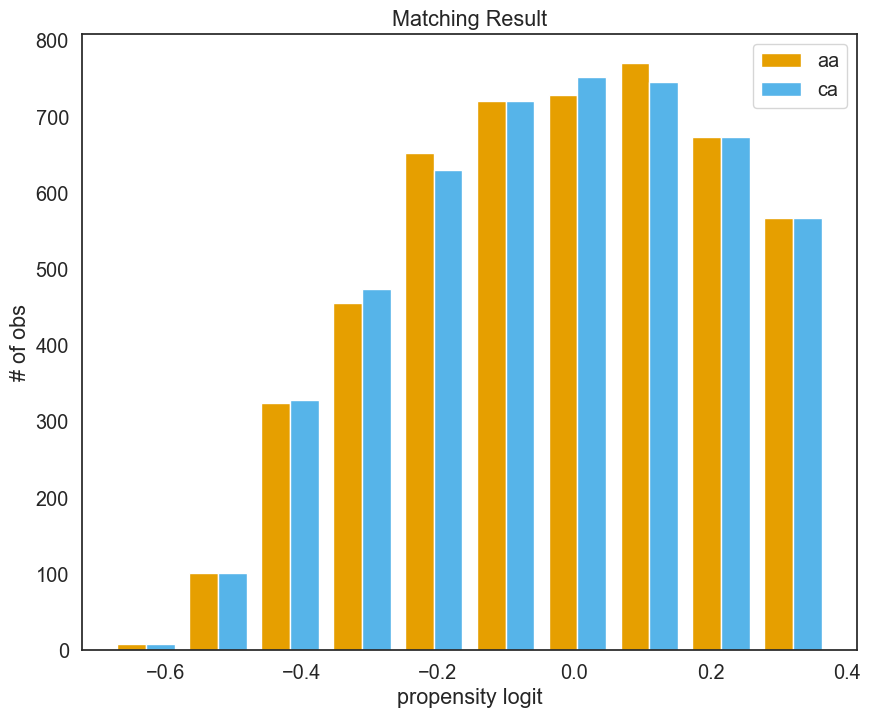

In [8]:
psm.plot_match(
    Title="Matching Result",
    Ylabel="# of obs",
    Xlabel="propensity logit",
    names=["aa", "ca"],
)

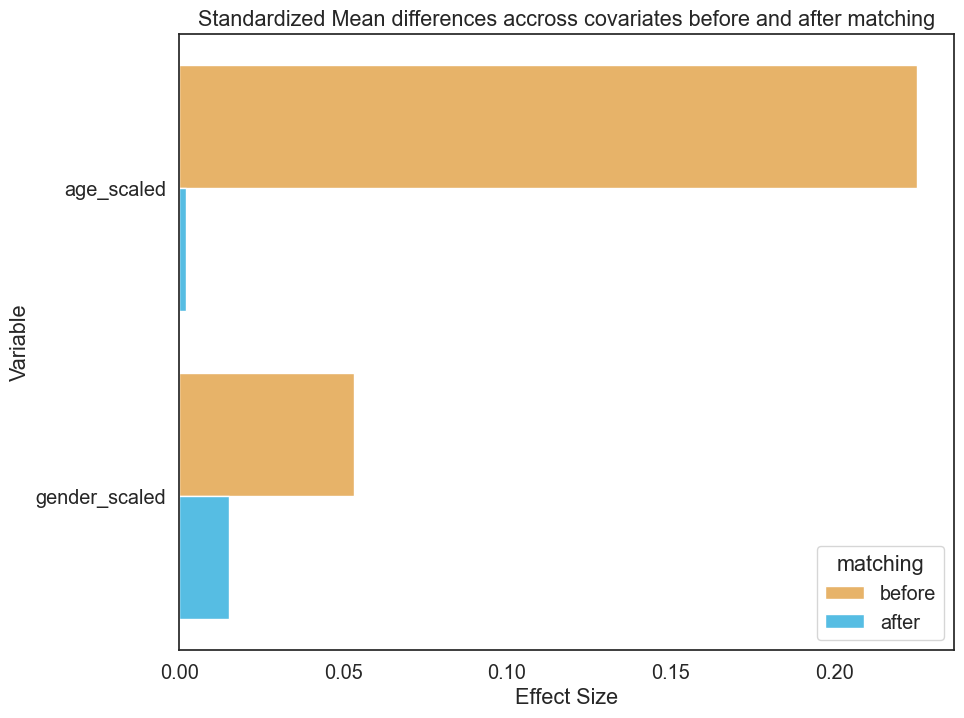

In [9]:
psm.effect_size_plot()

In [10]:
psm.effect_size

,Variable,matching,Effect Size
0,age_scaled,before,0.225376
1,age_scaled,after,0.002002
2,gender_scaled,before,0.053389
3,gender_scaled,after,0.015030


In [11]:
psm.df_matched

,index,age_scaled,gender_scaled,propensity_score,propensity_logit,race,matched_ID
0,0TAMIKABridgewater,-0.034847,-0.871446,0.500045,0.000180,0,9486MAHAPatterson
1,1JAMILARansom,-0.186230,-0.871446,0.508157,0.032630,0,19885MARCIPenley
2,2RICKIBrock,-0.438533,-0.871446,0.521665,0.086713,0,19993JERODWalker
3,3WENDELLPorter,1.529435,1.147518,0.430913,-0.278125,0,29584FREDRICEllig
4,4TYLee,-1.044062,1.147518,0.567943,0.273463,0,9164IVONNEHarrington
...,...,...,...,...,...,...,...
9995,21523AUGUSTLetcher,0.217456,1.147518,0.499756,-0.000977,1,NaN
9996,17005CAROLYNNHogan,1.428513,-0.871446,0.424755,-0.303282,1,NaN
9997,29022ALIXSpence,-0.892680,1.147518,0.557148,0.229595,1,NaN
9998,16274MIECZYSLAWPalmer,2.740492,1.147518,0.385368,-0.466824,1,NaN


In [12]:
psm.matched_ids

,index,matched_ID
0,0TAMIKABridgewater,9486MAHAPatterson
1,1JAMILARansom,19885MARCIPenley
2,2RICKIBrock,19993JERODWalker
3,3WENDELLPorter,29584FREDRICEllig
4,4TYLee,9164IVONNEHarrington
...,...,...
4995,4995MISTYCrawford,21523AUGUSTLetcher
4996,4996ADABarlow,17005CAROLYNNHogan
4997,4997TYRONEHaileselassie,29022ALIXSpence
4998,4998OLIVEBrown,16274MIECZYSLAWPalmer


In [13]:
dataset["gender"] = labelencoder.inverse_transform(dataset["gender"])
dataset

,first_name,last_name,age,gender,race,index,age_scaled,gender_scaled
0,TAMIKA,Bridgewater,47,f,0,0TAMIKABridgewater,-0.034847,-0.871446
1,JAMILA,Ransom,44,f,0,1JAMILARansom,-0.186230,-0.871446
2,RICKI,Brock,39,f,0,2RICKIBrock,-0.438533,-0.871446
3,WENDELL,Porter,78,m,0,3WENDELLPorter,1.529435,1.147518
4,TY,Lee,27,m,0,4TYLee,-1.044062,1.147518
...,...,...,...,...,...,...,...,...
29696,MIKHAIL,Cantrell,18,m,1,29696MIKHAILCantrell,-1.498208,1.147518
29697,SABINE,Spearing,28,f,1,29697SABINESpearing,-0.993601,-0.871446
29698,GAYLE,Mellow,62,f,1,29698GAYLEMellow,0.722063,-0.871446
29699,SHANE,Avena,48,m,1,29699SHANEAvena,0.015613,1.147518


In [14]:
aa_matched_dataset = dataset[dataset["index"].isin(psm.matched_ids["index"])]
aa_matched_dataset.drop(columns=["index", "race", "age_scaled", "gender_scaled"])

,first_name,last_name,age,gender
0,TAMIKA,Bridgewater,47,f
1,JAMILA,Ransom,44,f
2,RICKI,Brock,39,f
3,WENDELL,Porter,78,m
4,TY,Lee,27,m
...,...,...,...,...
4995,MISTY,Crawford,47,f
4996,ADA,Barlow,75,f
4997,TYRONE,Haileselassie,31,m
4998,OLIVE,Brown,90,f


In [15]:
ca_matched_dataset = dataset[dataset["index"].isin(psm.matched_ids["matched_ID"])]
ca_matched_dataset.drop(columns=["index", "race", "age_scaled", "gender_scaled"])

,first_name,last_name,age,gender
4,ARTUR,Miller,38,m
8,KAYLEE,Hochstetler,31,f
14,BERNARD,Sherfey,70,m
15,WES,Costa,65,m
37,ZINA,Mazzeo,61,f
...,...,...,...,...
29680,ROD,Davis,64,m
29683,DEL,Spencer,77,m
29688,FRANCIS,Mueller,75,m
29695,GERHARD,Lucas,56,m


In [16]:
ca_matched_dataset

,first_name,last_name,age,gender,race,index,age_scaled,gender_scaled
4,ARTUR,Miller,38,m,1,4ARTURMiller,-0.488994,1.147518
8,KAYLEE,Hochstetler,31,f,1,8KAYLEEHochstetler,-0.842219,-0.871446
14,BERNARD,Sherfey,70,m,1,14BERNARDSherfey,1.125749,1.147518
15,WES,Costa,65,m,1,15WESCosta,0.873446,1.147518
37,ZINA,Mazzeo,61,f,1,37ZINAMazzeo,0.671603,-0.871446
...,...,...,...,...,...,...,...,...
29680,ROD,Davis,64,m,1,29680RODDavis,0.822985,1.147518
29683,DEL,Spencer,77,m,1,29683DELSpencer,1.478974,1.147518
29688,FRANCIS,Mueller,75,m,1,29688FRANCISMueller,1.378053,1.147518
29695,GERHARD,Lucas,56,m,1,29695GERHARDLucas,0.419299,1.147518


In [17]:
aa_matched_dataset

,first_name,last_name,age,gender,race,index,age_scaled,gender_scaled
0,TAMIKA,Bridgewater,47,f,0,0TAMIKABridgewater,-0.034847,-0.871446
1,JAMILA,Ransom,44,f,0,1JAMILARansom,-0.186230,-0.871446
2,RICKI,Brock,39,f,0,2RICKIBrock,-0.438533,-0.871446
3,WENDELL,Porter,78,m,0,3WENDELLPorter,1.529435,1.147518
4,TY,Lee,27,m,0,4TYLee,-1.044062,1.147518
...,...,...,...,...,...,...,...,...
4995,MISTY,Crawford,47,f,0,4995MISTYCrawford,-0.034847,-0.871446
4996,ADA,Barlow,75,f,0,4996ADABarlow,1.378053,-0.871446
4997,TYRONE,Haileselassie,31,m,0,4997TYRONEHaileselassie,-0.842219,1.147518
4998,OLIVE,Brown,90,f,0,4998OLIVEBrown,2.134964,-0.871446


In [18]:
ca_matched_dataset.describe()

,age,race,age_scaled,gender_scaled
count,5000.000000,5000.0,5000.000000,5000.000000
mean,51.459800,1.0,0.190197,-0.030749
std,21.124953,0.0,1.065980,0.995371
min,18.000000,1.0,-1.498208,-0.871446
25%,33.000000,1.0,-0.741298,-0.871446
50%,50.000000,1.0,0.116535,-0.871446
75%,68.000000,1.0,1.024828,1.147518
max,108.000000,1.0,3.043257,1.147518


In [19]:
aa_matched_dataset.describe()

,age,race,age_scaled,gender_scaled
count,5000.000000,5000.0,5000.000000,5000.000000
mean,51.501600,0.0,0.192307,-0.045690
std,20.630393,0.0,1.041025,0.992721
min,18.000000,0.0,-1.498208,-0.871446
25%,34.000000,0.0,-0.690837,-0.871446
50%,50.000000,0.0,0.116535,-0.871446
75%,68.000000,0.0,1.024828,1.147518
max,110.000000,0.0,3.144178,1.147518


In [20]:
ca_matched_dataset["gender"].value_counts()

gender
f    2918
m    2082
Name: count, dtype: int64

In [21]:
aa_matched_dataset["gender"].value_counts()

gender
f    2955
m    2045
Name: count, dtype: int64

In [22]:
with open(os.path.join(folder_location, "aa_matched.csv"), "w") as f:
    aa_matched_dataset.to_csv(
        f,
        header=True,
        columns=["first_name", "last_name", "age", "gender"],
        index=False,
    )

with open(os.path.join(folder_location, "ca_matched.csv"), "w") as f:
    ca_matched_dataset.to_csv(
        f,
        header=True,
        columns=["first_name", "last_name", "age", "gender"],
        index=False,
    )